<a href="https://colab.research.google.com/github/MaykonDias/Analise-Brazilian-E-Commerce-Olist/blob/main/Olisti_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [66]:
#DEFININDO VARIAVEIS PARA CADA TABELA
df_items = pd.read_csv("olist_order_items_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_pedidos = pd.read_csv("olist_orders_dataset.csv")
df_produtos = pd.read_csv("olist_products_dataset.csv")
df_geolocalizacao = pd.read_csv("olist_geolocation_dataset.csv")
df_vendedores = pd.read_csv("olist_sellers_dataset.csv")
df_pagamento = pd.read_csv("olist_order_payments_dataset.csv")
df_cliente = pd.read_csv("olist_customers_dataset.csv")
df_categoria = pd.read_csv("product_category_name_translation.csv")


In [47]:
#formatando a coluna de datas da tabela pedidos em datas
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_approved_at'] = pd.to_datetime(df_pedidos['order_approved_at'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'])
df_pedidos['order_delivered_carrier_date'] = pd.to_datetime(df_pedidos['order_delivered_carrier_date'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])


In [51]:
#tirando todos NaN e trocando por outro termo dentro da tabela de reviews
df_reviews['review_comment_title'] = df_reviews['review_comment_title'].fillna("Sem Titulo")
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].fillna("Sem cometário")

#tirando todos os NaN e trocando por outro termo dentor da tabela produtos
df_produtos['product_category_name'] = df_produtos['product_category_name'].fillna("Categoria não especificado")
df_produtos['product_name_lenght'] = df_produtos['product_name_lenght'].fillna(0)
df_produtos['product_description_lenght'] = df_produtos['product_description_lenght'].fillna(0)
df_produtos['product_photos_qty'] = df_produtos['product_photos_qty'].fillna(0)
df_produtos['product_weight_g'] = df_produtos['product_weight_g'].fillna(0)
df_produtos['product_length_cm'] = df_produtos['product_length_cm'].fillna(0)
df_produtos['product_height_cm'] = df_produtos['product_height_cm'].fillna(0)
df_produtos['product_width_cm'] = df_produtos['product_width_cm'].fillna(0)



In [52]:
#usando o modelo relacional
df = df_items.merge(df_pedidos, on="order_id", how="inner")
df = df.merge(df_cliente, on="customer_id", how="inner")
df = df.merge(df_pagamento, on="order_id", how="inner")
df = df.merge(df_vendedores, on="seller_id", how="inner")
df = df.merge(df_reviews, on="order_id", how="inner")
df = df.merge(df_produtos[['product_id', 'product_category_name']], on='product_id', how='left')



In [8]:
#tranformando as colunas em formato de datas
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])



In [9]:
#comparar a ordem do pedido aprovado com a quantidade de compras em meses
df_mensal = df.dropna(subset=['order_approved_at'])
pedidos_mensal = df_mensal.groupby(df_mensal['order_approved_at'].dt.to_period('M'))['order_item_id'].count()

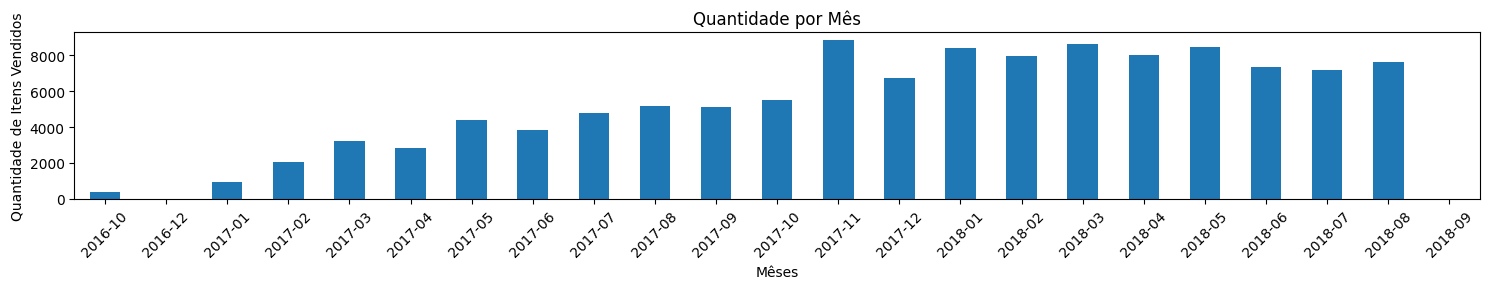

In [10]:
pedidos_mensal.plot(kind="bar", width=0.5, figsize=(15,3), title="Quantidade por Mês")
plt.xlabel('Mêses')
plt.ylabel('Quantidade de Itens Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
#comparar a ordem do pedido aprovado com a quantidade de compras em trimestre
df_trimestre = df.dropna(subset=['order_approved_at'])
pedidos_trimestre = df_trimestre.groupby(df_trimestre['order_approved_at'].dt.to_period('Q'))['order_item_id'].count()

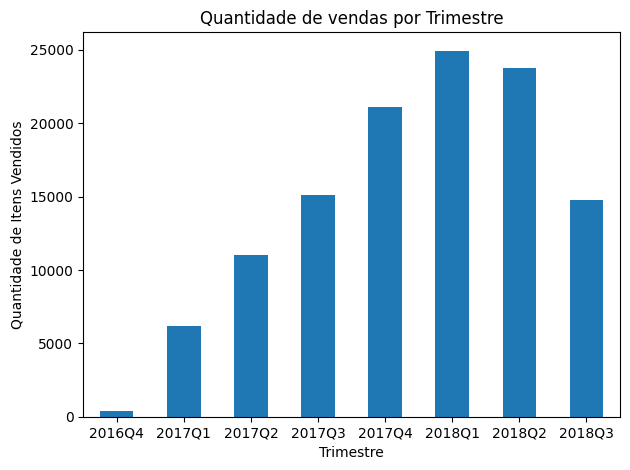

In [12]:
#grafico plotado
pedidos_trimestre.plot(kind="bar", title="Quantidade de vendas por Trimestre")
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Itens Vendidos')
plt.xticks(rotation=0)
plt.tight_layout()

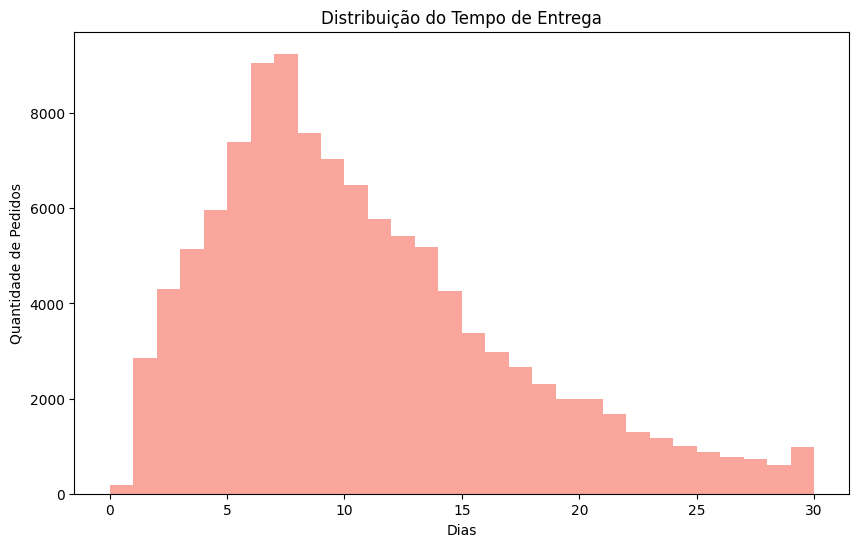

In [13]:
#mostrar o tempo de entrega
tempo_entrega = df['order_delivered_customer_date'] - df['order_approved_at']
tempo_dias = tempo_entrega.dt.days
tempo_entrega_val = tempo_dias[(tempo_dias >= 0) & (tempo_dias.notna())]

plt.figure(figsize=(10, 6))
plt.hist(tempo_entrega_val[tempo_entrega_val <=30], bins=30, color='salmon', alpha=0.7)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Dias')
plt.ylabel('Quantidade de Pedidos')
plt.show()

In [112]:
faturamento = df.groupby('product_category_name').apply(lambda x: (x['price'] + x['freight_value']).sum()).sort_values(ascending=False)


<ipython-input-112-62d88f17c8c2>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



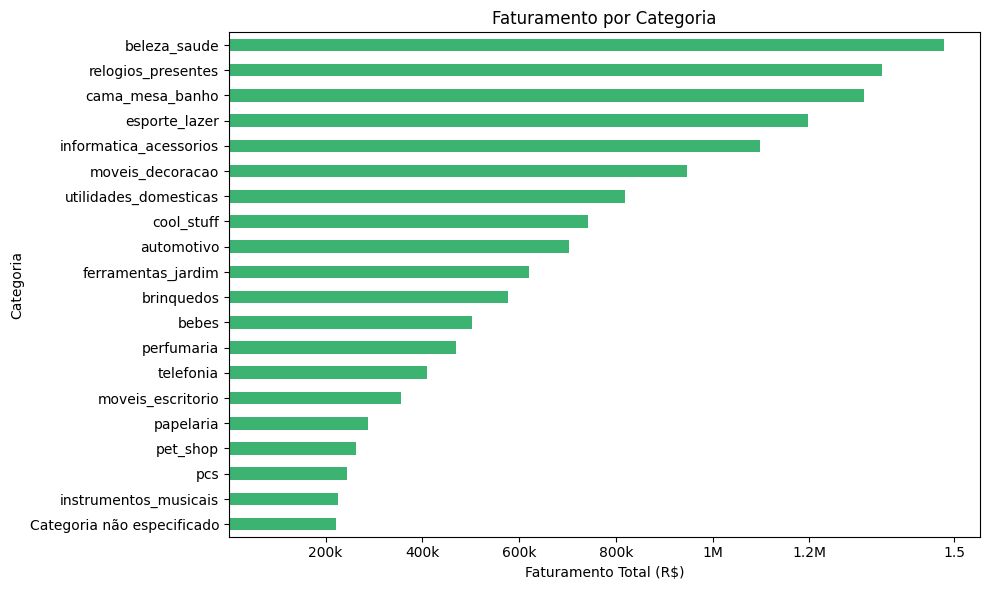

In [113]:
faturamento.head(20).plot(kind='barh', figsize=(10,6), color='lightcoral')
faturamento_melhores = faturamento.head(20)
faturamento_melhores.plot(kind='barh', figsize=(10, 6), color='mediumseagreen')


xticks = [200_000, 400_000, 600_000, 800_000, 1_000_000, 1_200_000,1_500_000]
xlabels = ['200k', '400k', '600k', '800k', '1M', '1.2M', '1.5']
plt.xticks(ticks=xticks, labels=xlabels)


plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [114]:
faturamento_melhores

,0
product_category_name,
beleza_saude,1478861.62
relogios_presentes,1349426.23
cama_mesa_banho,1313577.37
esporte_lazer,1196819.88
informatica_acessorios,1098475.97
moveis_decoracao,946643.83
utilidades_domesticas,818075.59
cool_stuff,742905.15
automotivo,704018.60


In [124]:
#fazendo uma tabela por perdidos por estados e agrupando
pedidos_por_estado = (
    df_pedidos.merge(df_cliente, on='customer_id')
    .groupby('customer_state', as_index=False)
    .agg(total_pedidos=('order_id', 'count'))
    .sort_values('total_pedidos', ascending=False)
    .rename(columns={'customer_state': 'estado'})
)
pedidos_por_estado

,estado,total_pedidos
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


In [125]:
#Apos o merge adcionamos uma coluna de geolocalizacao com lat. e long.
df_geo_estado = df_geolocalizacao.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix'
}).merge(df_cliente[['customer_zip_code_prefix', 'customer_state']], on='customer_zip_code_prefix', how='left')

geo_por_estado = (
    df_geo_estado.groupby('customer_state')[['geolocation_lat', 'geolocation_lng']]
    .mean()
    .reset_index()
    .rename(columns={'customer_state': 'estado'})
)

pedidos_por_estado = pedidos_por_estado.merge(geo_por_estado, on='estado', how='left')


In [119]:
pedidos_por_estado

,estado,total_pedidos,geolocation_lat,geolocation_lng
0,SP,41746,-23.121634,-47.071705
1,RJ,12852,-22.823823,-43.149286
2,MG,11635,-19.836878,-44.510639
3,RS,5466,-29.718839,-51.956086
4,PR,5045,-24.906915,-50.609280
5,SC,3637,-27.218039,-49.482128
6,BA,3380,-13.168812,-39.553189
7,DF,2140,-15.813683,-47.987605
8,ES,2033,-20.226267,-40.387406
9,GO,2020,-16.683542,-49.381153


In [127]:
#grafico de densidades por pedidos em cada estados
grafico = px.density_mapbox(pedidos_por_estado, lon='geolocation_lng', lat='geolocation_lat', z='total_pedidos', mapbox_style='open-street-map', zoom= 3, radius = 10)
grafico.update_layout(margin={"r": 0, "t": 0, "b": 0, "l":0})
grafico.show()